In [1]:
%matplotlib inline 
!pip install -q matplotlib_venn

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import *
from random import *

In [3]:
from fractions import Fraction 

# pretty fractions
Fraction.__repr__ = Fraction.__str__
html_formatter = get_ipython().display_formatter.formatters['text/latex']
html_formatter.for_type(Fraction, lambda f: r"$\frac{%s}{%s}$" % (f.numerator, f.denominator));

In [4]:
from matplotlib_venn import venn2

# pretty sets
def plot_set(*sets):
    venn2(sets)
    plt.show()
    return None

# Mathematics: From Probability to Statitics

- **[Trial](https://en.wikipedia.org/wiki/Experiment_(probability_theory%29):**
  A single occurrence with an outcome that is uncertain until we observe it. 
  <br>*For example, rolling a single die.*
- **[Outcome](https://en.wikipedia.org/wiki/Outcome_(probability%29):**
  A possible result of a trial; one particular state of the world. What Laplace calls a **case.**
  <br>*For example:* `4`.
- **[Sample Space](https://en.wikipedia.org/wiki/Sample_space):**
  The set of all possible outcomes for the trial. 
  <br>*For example,* `{1, 2, 3, 4, 5, 6}`.
- **[Event](https://en.wikipedia.org/wiki/Event_(probability_theory%29):**
  A subset of outcomes that together have some property we are interested in.
  <br>*For example, the event "even die roll" is the set of outcomes* `{2, 4, 6}`. 
- **[Probability](https://en.wikipedia.org/wiki/Probability_theory):**
  As Laplace said, the probability of an event with respect to a sample space is the "number of favorable cases" (outcomes from the sample space that are in the event) divided by the "number of all the cases" in the sample space (assuming "nothing leads us to expect that any one of these cases should occur more than any other"). Since this is a proper fraction, probability will always be a number between 0 (representing an impossible event) and 1 (representing a certain event).
<br>*For example, the probability of an even die roll is 3/6 = 1/2.*


## Classical Probability: Lapace

In [5]:
dice_odd = {1, 3, 5}
dice_outcomes =  {1, 2, 3, 4, 5, 6}

dice_low = {1, 2}

In [6]:
def probability(event_set, outcome_set):
    return len(event_set & outcome_set) / len(outcome_set)



probability(dice_odd, dice_outcomes), probability(dice_low, dice_outcomes)

(0.5, 0.3333333333333333)

In [7]:
chosen = set.intersection
outcomes  = len

def Pr(event, space): 
    return Fraction(
            outcomes(chosen(event, space)), # /
            outcomes(space)
    )
                    
Pr(dice_odd, dice_outcomes), Pr(dice_low, dice_outcomes)

(1/2, 1/3)

Notationally in mathematics, we take the outcome space as "context" and rarely specifity it explicitly:

$P(D_{odd}) = \frac{1}{2}$

In [8]:
def fix(f, fixed_outcomes):
    return lambda event: f(event, fixed_outcomes)

P = fix(Pr, dice_outcomes)

P(dice_odd)

1/2

A convention I'll follow in this note book is that `Pr` and other functions ending in `r` require *both* the event and the outcome space (you could read `r` as *relative*, but its chosen just because `Pr` as means "probability"). I'll use `P` when the outcome space is fixed (eg., as a default argument). 

### Combining Events

$P(D_{odd} \, \& \, D_{low}) = P(D_{odd} \, and \, D_{low}) $

In [9]:
probability(dice_odd & dice_low, dice_outcomes)

0.16666666666666666

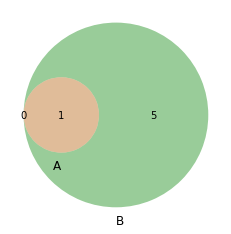

In [10]:
plot_set(dice_odd & dice_low, dice_outcomes)

$P(D_{odd} \, | \, D_{low}) = P(D_{odd} \, or \, D_{low}) $

In [11]:
P(dice_odd | dice_low)

2/3

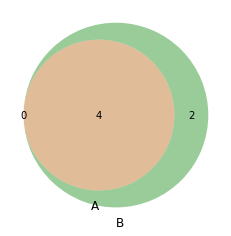

In [12]:
plot_set(dice_odd | dice_low, dice_outcomes)

## Cards

In [13]:
suit = '♥♠♦♣'
rank = 'AKQJT98765432'

deck  = {r + s for r in rank for s in suit}
hands = set(combinations(deck, 5))

len(deck), len(hands)

(52, 2598960)

In [14]:
sample(deck, 2)

['3♥', 'J♦']

In [15]:
len(suit), len(rank)

(4, 13)

In [16]:
players = sample(hands, 3)
players

[('K♥', 'K♠', '2♣', 'Q♣', 'A♥'),
 ('6♥', 'J♠', 'A♦', '8♣', '6♦'),
 ('Q♦', 'T♦', '4♥', 'A♥', '2♥')]

In [17]:
{suit for (rank, suit) in players[0]}

{'♠', '♣', '♥'}

In [18]:
len({rank for (rank, suit) in players[2]})

5

In [19]:
def is_flush(hand):
    return len({suit for (rank, suit) in hand}) == 1 # only one suit

def is_couple(hand):
    return len({rank for (rank, suit) in hand}) == 2 # only two ranks

In [20]:
flush = {h for h in hands if is_flush(h)}
couple = {h for h in hands if is_couple(h)}

In [21]:
len(flush), len(couple)

(5148, 4368)

* probability of getting a flush

In [22]:
Pr(flush, hands)

33/16660

In [23]:
f"1 in {16660/33 :.0f}"

'1 in 505'

* probability of a four of a kind

In [24]:
Pr(couple, hands)

1/595

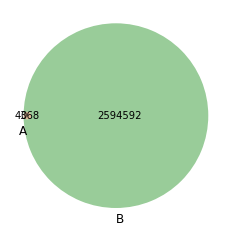

In [26]:
plot_set(couple, hands)

* probability of four of a kind, or a flush

In [27]:
Pr(couple | flush, hands)

61/16660

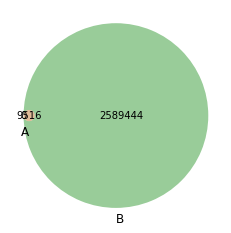

In [29]:
plot_set(couple| flush, hands)

## Random Variabels and The Central Limit Theorm

* A Random Variable is a *function* which maps from an outcome space to the real number line 
    * the real number line is the "feature space" we deal with often in machine learning and statistics
    * ie., our data is contious and numerical, not "cards"

* In review, suppose we take all two-card draws as our outcomes:

In [41]:
suit = '♥♠♦♣'
rank = 'AKQJT98765432'

two_hands = set(combinations(deck, 2))

len(deck), len(two_hands)

(52, 1326)

In [43]:
sample(two_hands, 2)

[('9♣', '2♠'), ('4♠', 'J♣')]

In [57]:
outcome_space = two_hands

print('A Hand: ', ' '.join( sample(outcome_space, 1)[0] ))
print('Total Number:', len(outcome_space))

A Hand:  K♥ A♥
Total Number: 1326


* Now define a random variable that can assign *for any outcome* a *real number*
    * here the number of face cards in a hand is used 

In [32]:
def rv(outcome):
    return len([rank for (rank, suit) in outcome if rank in ['A', 'K', 'Q', 'J']])

In [58]:
rv(('K♥', 'A♥'))

2

* We get to the feature space (ie., the real number line) by transforming each outcome with `rv()`


$X_i = RV(event_i)$

In [60]:
feature_space = np.array([rv(outcome) for outcome in outcome_space])
feature_space[:20]

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0])

* A probability can then be assign to any outcome by taking the ratio of each observation to the total  

$P(X_i = o) = \frac{o}{\Sigma X_i}$ 

In [34]:
probability_space = feature_space / feature_space.sum()

* The probability of any given hand is low.

In [35]:
probability_space[:4]

array([0.00122549, 0.        , 0.00122549, 0.        ])

* Let's return to the feature space, as that's what we're usually dealing with in statistics.

In [61]:
n_face, freq = np.unique(feature_space, return_counts=True)

In [62]:
probability_mass = freq/freq.sum()

In [63]:
dict(zip(n_face, probability_mass))

{0: 0.4751131221719457, 1: 0.4343891402714932, 2: 0.09049773755656108}

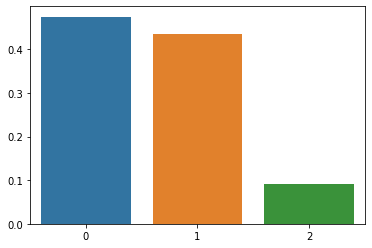

In [65]:
import seaborn as sns
sns.barplot(n_face, probability_mass);

### Random Variables and Sampling

* Review

In [66]:
rv = lambda outcome: len([rank for (rank, suit) in outcome if rank in ['A', 'K', 'Q', 'J']])

outcome_space = two_hands
feature_space = np.array([rv(outcome) for outcome in outcome_space])

* Samples:
    * suppose we play a game of pairs until we hit 100 hands
    * each *game* is then a sample of 100 hands from our whole feature_space
    * suppose we now observe 1000 such games

In [67]:
feature_samples = [np.random.choice(feature_space, 100) for _ in range(1000)]

So every game saw 30 flushes, and in the first game each flush had the following number of hearts: 

In [68]:
feature_samples[0]

array([2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1,
       0, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0])

The mean of the first sampled game (ie., the avg num  faces/game) is:

In [82]:
sum([feature_samples[0].mean(),feature_samples[1].mean(), feature_samples[2].mean()])/3

0.54

* Mean of each sample (ie., each game):

In [83]:
sample_means = [sample.mean() for sample in feature_samples]
sample_means[:5]

[0.45, 0.57, 0.6, 0.56, 0.56]

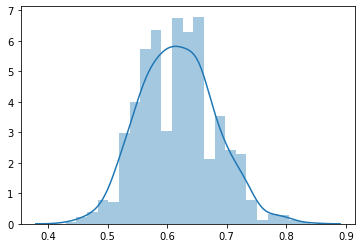

In [84]:
sns.distplot(sample_means);

In [111]:
@interact(hands=100, N=1000)
def draw(hands, N):
    hands = 1 if hands <= 0 else hands
    N = 1 if N <= 0 else N 
    
    feature_samples = [np.random.choice(feature_space, hands) for _ in range(N)]
    sample_means = np.array([sample.mean() for sample in feature_samples])
    
    std_sample = sample_means.std() / np.sqrt(N)
    
    plt.axvline(feature_space.mean(), color='green')
    plt.axvline(feature_space.mean() + std_sample, color='red')
    plt.axvline(feature_space.mean() - std_sample, color='red')
    
    plt.axvline(sample_means.mean(), color='yellow')
    sns.distplot(sample_means);

interactive(children=(IntSlider(value=100, description='hands', max=300, min=-100), IntSlider(value=1000, desc…

## Probability Density

Everything up to here has been about discrete, finite sample spaces, where we can enumerate all the possible outcomes.

But a reader asked about continuous sample spaces, such as the space of real numbers. The principles are the same: probability is still the ratio of the favorable cases to all the cases, but now instead of counting cases, we have to (in general) compute integrals to compare the sizes of cases. Here we will cover a simple example, which we first solve approximately by simulation, and then exactly by calculation.

### Vocab.

* Density 

* [Frequency](https://en.wikipedia.org/wiki/Frequency_%28statistics%29): a non-negative number describing how often an outcome occurs. Can be a count like 5, or a ratio like 1/6.

* [Distribution](http://mathworld.wolfram.com/StatisticalDistribution.html): A mapping from outcome to frequency of that outcome. We will allow sample spaces to be distributions. 

* [Probability Distribution](https://en.wikipedia.org/wiki/Probability_distribution): A probability distribution
is a distribution whose frequencies sum to 1. 


* Uniform

$U(x; a, b) = \frac{1}{b - a}$

In [ ]:
a = 0
b = 10

def uniform_ten(x, min=a, max=b):
    return 1/(max - min)

uni_range = list(range(a, b))
uni_dist = [uniform_ten(x) for x in uni_range]

sns.barplot(uni_range, uni_dist);

$P( l < x < h ) = \int_{l}^{h} U(x) dx $

$\int_{l}^{h} \frac{1}{b - a} dx =  [\frac{x}{b - a}]^l_h  $

$\therefore  P( l < x < h ) = \frac{h - l}{b - a} $

In [93]:
from scipy import integrate
def area_of(f):
    return lambda start, end : np.round(integrate.quad(f, start, end)[0], 4)

In [ ]:
Pu = area_of(uniform_ten)

Pu(0,1), Pu(1, 10), Pu(0,10)

In [ ]:
def uniform_integral(low, high, min=a, max=b):
    return (high / (max - min)) - (low / (max - min))
    
uniform_integral(0, 1)

In [ ]:
sns.barplot(uni_range, [ Pu(x, x+1) for x in uni_range]);

#### Normal

$N(x; \mu, \sigma ) = (2\pi\sigma^2)^{-\frac{1}{2}} \, e^{ - \frac{(x-\mu)^2}{2\sigma}}$

In [97]:
iq_mean = 100
iq_stdv = 15

def iq_normal(x, m=iq_mean, s=iq_stdv):
    v = 2 * s ** 2
    c = (np.pi * v) ** -0.5
    
    return c * np.exp( - ((x - m) ** 2) / v )

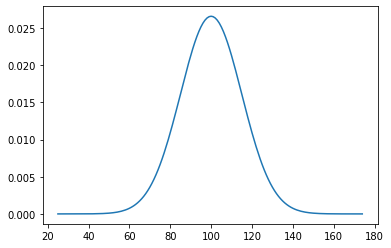

In [98]:
iq_range = list(range(iq_mean - 5*iq_stdv, iq_mean + 5*iq_stdv))

iq_dist = [ iq_normal(x) for x in iq_range ]

sns.lineplot(iq_range, iq_dist);

In [104]:
Piq = area_of(iq_normal)

In [105]:
Piq(99, 101)

0.0532

In [106]:
(iq_mean - iq_stdv, iq_mean + iq_stdv)

(85, 115)

In [107]:
Piq(iq_mean - 1*iq_stdv, iq_mean + 1*iq_stdv)

0.6827

In [108]:
Piq(iq_mean - 2*iq_stdv, iq_mean + 2*iq_stdv)

0.9545

In [109]:
Piq(iq_mean - 3*iq_stdv, iq_mean + 3*iq_stdv)

0.9973

In [ ]:
1 - Piq(iq_mean - 2*iq_stdv, iq_mean + 2*iq_stdv)

In [110]:
from ipywidgets import interact

@interact(low=85, high=115)
def draw(low, high):
    plt.axvline(low, color='red')
    plt.axvline(high, color='red')
    plt.plot(iq_range, iq_dist)
    plt.ylabel('density(x)')
    plt.xlabel('x')
    plt.title(f"P({low} < IQ < {high}) = {Piq(low, high): .3f}")

interactive(children=(IntSlider(value=85, description='low', max=255, min=-85), IntSlider(value=115, descripti…

# Extra: Probability Mass

The probaility and sets methods above only apply when you can define the outcome space, ie., the space of equiprobable events; which is often not the case. Eg., in an election, the space of "equiprobable outcomes" are all possible future worlds.

*Statistics* beings to blur into probability here, where we go straight to defining the *probability distribution* rather than the probability of each possible individual event. At an intermediate point we have probability mass functions which assign a probability to discrete non-equal outcomes (rather than going via a random-variable transformation). 

"Mass" here is an equivalent term for "probability" but it is used to emphasize there is now a *uneven distribution* and some outcomes are "heavier".

In [ ]:
from collections import Counter

# a dictionary with special counting methods
class pmf(Counter): 
    pass

In [ ]:
dice = pmf({1, 2, 3, 4, 5, 6})
dice

In [ ]:
biased = pmf({1: 0.1, 2: 0.1, 3: 0.1, 4: 0.1, 5: 0.1, 6: 0.5})
biased

In [ ]:
dice.values(), sum(dice.values()), sum(biased.values())

In [ ]:
def mass(dist):
    return sum(dist.values())

def favorable(event, space):
    if callable(event):
        event = thatr(event, space)
        
    return pmf({x: space[x] for x in  space if x in event})

In [ ]:
def Pr(event, space): 
    space = pmf(space)
    return mass(favorable(event, space)) / mass(space)

In [ ]:
dice[1], mass(dice), dice[1]/mass(dice)

In [ ]:
biased[1], mass(biased), biased[1]/mass(biased)

In [ ]:
def even(event):
    return event % 2 == 0


Pr(even, dice), Pr(even, biased)

In [ ]:
def die(n): 
    return set(range(1, n + 1))

Pr(even, die(12)), Pr(even, die(13))

## Extra: Events as Subsets 

# Hypothesis Testing: Solution

## Exercise 1

The local newspaper reported: Average debt of local university graduates is £3262.

You think that local university gradautes have smaller debt balances.

You conduct a study of 50 randomly selected local university graduates, and find the average debt is £2995.

You also find that the population standard deviation is £1100.

Is your opinion supported by the study conducted, at a 0.05 level of significance?

### 🧐 Formulate Hypothesis

$H_{0}$: $mu=3262$

$H_{1}$: $mu<3262$, **i.e. we have a One Tailed Test**

### 🧐 Set $\alpha$

$\alpha$ = 5% = 0.05

### 🧐 Calculate the z Test Statistic

In [1]:
xbar = 2995
mu = 3262
sd = 1100
n = 50

In [2]:
import numpy as np
z = (xbar - mu) / ( sd / np.sqrt(n) )
z

-1.7163410052437107

### 🧐 Calculate the "p-value"

In [3]:
import scipy.stats
Phi_z = scipy.stats.norm.cdf(z)
Phi_z

0.04304982368670932

In [4]:
pval = Phi_z
pval

0.04304982368670932

### 🧐 Decision

p-value < $\alpha$ 

$\therefore$ we reject the null hypothesis and infer that the local univeristy graduates debt is less than the reported average debt.

### Bonus Quesitons

**What is the Critical Value?**

In [5]:
scipy.stats.norm.ppf(0.05)

-1.6448536269514729

**Is our Test Statistic calculated above higher or lower than this Critical Value?**

In [6]:
z < scipy.stats.norm.ppf(0.05)

True

**Is our Test Statistic in the Critical Region?**

yes

**Decision?**

$\therefore$ we reject the null hypothesis and infer that the local univeristy graduates debt is less than the reported average debt.

In [ ]:
def marbles(color, n):
    return {color + str(i) for i in range(1, n + 1)}

marbles('B', 3) | marbles('R', 2)

Urn contains 6 blue, 9 red and 8 white marbles. 

We select 6 marbles at random, what is $P(A)$ for 


$A_{red}$ = {all red}  $A_{mix}$ = {3 blue, 1 red, 2 white}, $A_{fourw}$ = {exactly 4 are white}



In [ ]:
urn = marbles('B', 6) | marbles('R', 9) | marbles('W', 8) 
sample(urn, 6)

In [ ]:
take_six = set(combinations(urn, 6))
len(take_six)

In [ ]:
draws = sample(take_six, 3)
draws[0]

$P(\#Red = 6)$

In [ ]:
def ncol(col, n):
    return lambda event: [ m[0] for m in event ].count(col) == n

def thatr(predicate, space):
    return { event for event in space if predicate(event)}


In [ ]:
six_red = thatr(ncol('R', 6), take_six)
sample(six_red, 2)

In [ ]:
Pr(thatr(ncol('R', 6), take_six), take_six)

In [ ]:
P = fix(Pr, take_six)
that = fix(thatr, take_six)

In [ ]:
P(that(ncol('R', 6))) 

In [ ]:
P(
    that(ncol('B', 3)) & 
    that(ncol('R', 1)) & 
    that(ncol('W', 2))  
)

In [ ]:
P( that(ncol('W', 4)) )

In [ ]:
plot_set(that(ncol('W', 4)), take_six)

## Counting Faster
Let's verify these calculations using basic arithmetic, rather than exhaustive counting.

the number of ways of choosing c out of n items is (n choose c) = n! / ((n - c)! × c!). We can translate that to code:

In [ ]:
from math import factorial

def choose(n, c):
    "Number of ways to choose c items from a list of n items."
    return factorial(n) // (factorial(n - c) * factorial(c))


choose(9, 6)

In [ ]:
N = len(take_six)

P(that(ncol('R', 6))) == Fraction(choose(9, 6), N)

# NB. The Use of Python 

## Mathematical Context and Partial Application

It's common in mathematics to leave out "parameters" of the expression -- which makes it quite hard to read if you haven't fully absorbed yourself in the problem. However the expression is *clearer* and *emphasizes the important terms* when you are. 

We can achive the same "leaving things out" effect with partial application -- which means, "somehow" filling in parameters of a function with defaults and leaving some free.

In this notebook I partially apply just using basic python syntax in the following way: a function (eg., `fix`) takes a function (eg., `f`) and returns a new one. The new one has fewer parameters. It calls the original (ie., `fix`) filling in *all* of its parameters; but forwarding a few. See above.

Currying is also useful and quite similar. This allows us to generate a function with some "internals" fixed by the parent function. In this case the inner-function is always the same one, ie., we don't take an `f`, we generate the same kind of function each time.

In [ ]:
def value_is(equals):
    return lambda value: value == equals

is_happy = value_is("happy")

is_happy("happy"), is_happy("sad")